In [1]:
import pandas as pd
import numpy as np

In [2]:
from imblearn.datasets import fetch_datasets

In [3]:
ts = fetch_datasets()['thyroid_sick']

In [4]:
type(ts)

sklearn.utils._bunch.Bunch

In [5]:
ts['data']

array([[41.,  1.,  0., ...,  1.,  0.,  0.],
       [23.,  1.,  0., ...,  0.,  0.,  0.],
       [46.,  0.,  1., ...,  0.,  0.,  0.],
       ...,
       [74.,  1.,  0., ...,  0.,  0.,  0.],
       [72.,  0.,  1., ...,  0.,  0.,  1.],
       [64.,  1.,  0., ...,  0.,  0.,  0.]])

In [6]:
# df = pd.DataFrame(ts)
df = pd.DataFrame(ts['data'])

In [7]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,41.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.14,0.0,1.0,109.0,1.0,0.0,0.0,1.0,0.0,0.0
1,23.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.31,1.0,0.0,88.0,1.0,1.0,0.0,0.0,0.0,0.0
2,46.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.91,0.0,1.0,120.0,1.0,1.0,0.0,0.0,0.0,0.0
3,70.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.20,1.0,0.0,50.0,1.0,1.0,0.0,0.0,0.0,0.0
4,70.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.87,0.0,1.0,70.0,1.0,0.0,0.0,0.0,0.0,1.0


In [8]:
df.columns

RangeIndex(start=0, stop=52, step=1)

In [9]:
# df.target.unique()

In [10]:
df['target'] = ts['target']

In [11]:
# df.size

In [12]:
df.columns

Index([       0,        1,        2,        3,        4,        5,        6,
              7,        8,        9,       10,       11,       12,       13,
             14,       15,       16,       17,       18,       19,       20,
             21,       22,       23,       24,       25,       26,       27,
             28,       29,       30,       31,       32,       33,       34,
             35,       36,       37,       38,       39,       40,       41,
             42,       43,       44,       45,       46,       47,       48,
             49,       50,       51, 'target'],
      dtype='object')

In [13]:
dic = {'one':[[1,2]],
       'two':[[4,5]]}

In [14]:
df1 = pd.DataFrame(dic)

In [15]:
df1

,one,two
0,"[1, 2]","[4, 5]"


In [16]:
X = ts.data
y = ts.target

In [17]:
target_counts = df['target'].value_counts()

In [18]:
target_counts

-1    3541
 1     231
Name: target, dtype: int64

In [19]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'target classes')

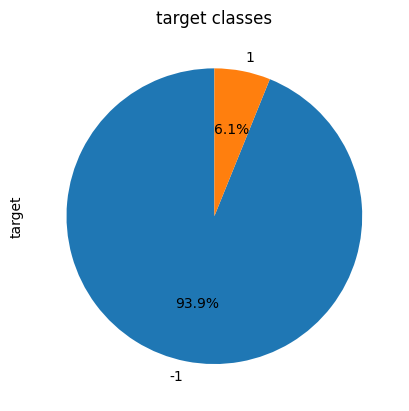

In [20]:
target_counts.plot.pie(autopct='%1.1f%%', labels=df.target.unique(),startangle=90)
# plt.axis('equal')
plt.title('target classes')

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [22]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, random_state=4)

In [23]:
dt = DecisionTreeClassifier()

In [24]:
dt.fit(X_tr,y_tr)

DecisionTreeClassifier()

In [25]:
clf = LogisticRegression()

In [26]:
clf.fit(X_tr, y_tr)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
ydp = dt.predict(X_te)

In [28]:
ylp = clf.predict(X_te)

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
print(accuracy_score(ydp, y_te))
print(accuracy_score(ylp, y_te))

0.9787985865724381
0.9584805653710248


In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [32]:
class_labels = {0: 1, 1: -1}

In [33]:
disp = confusion_matrix(y_te,ylp)

In [34]:
disp

array([[1042,   12],
       [  35,   43]])

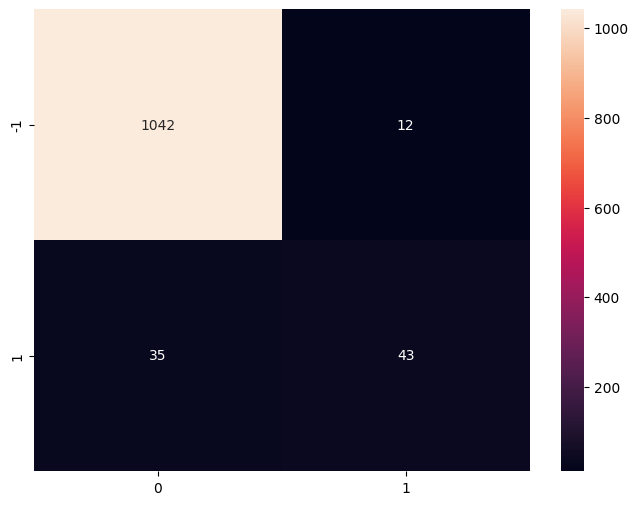

In [35]:
plt.figure(figsize=(8,6))
sns.heatmap(disp, annot=True, fmt='.0f')
tick_positions = np.arange(0.5, len(disp), 1)
# plt.xticks([0, 1], [1, -1])
plt.yticks(tick_positions, [-1, 1])
plt.show()

In [36]:
disp1 = confusion_matrix(y_te,ydp)

In [37]:
disp1

array([[1044,   10],
       [  14,   64]])

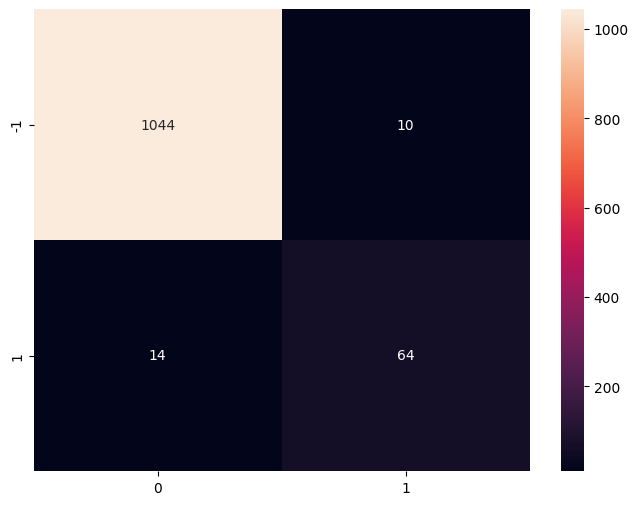

In [38]:
plt.figure(figsize=(8,6))
sns.heatmap(disp1, annot=True, fmt='.0f')
tick_pos = np.arange(0.5, len(disp1), 1)
plt.yticks(tick_pos, [-1, 1])
plt.show()

In [39]:
from sklearn.metrics import precision_score, recall_score

In [40]:
psd = precision_score(y_te, ydp)
psl = precision_score(y_te, ylp)
rsd = recall_score(y_te, ydp)
rsl = recall_score(y_te, ylp)

In [41]:
print(psd, rsd)
print(psl, rsl)

0.8648648648648649 0.8205128205128205
0.7818181818181819 0.5512820512820513


In [42]:
clf1 = LogisticRegression(class_weight="balanced")

In [43]:
clf1.fit(X_tr,y_tr)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [44]:
y1pred = clf1.predict(X_te)

In [45]:
print(accuracy_score(y_te, y1pred))

0.8807420494699647


In [46]:
disp2 = confusion_matrix(y_te, y1pred)

In [47]:
disp2

array([[928, 126],
       [  9,  69]])

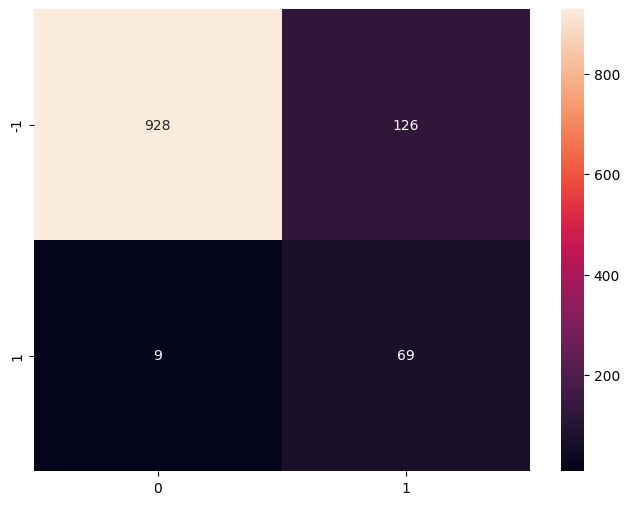

In [48]:
plt.figure(figsize=(8,6))
sns.heatmap(disp2, annot=True, fmt='.0f')
tick_pos = np.arange(0.5, len(disp1), 1)
plt.yticks(tick_pos, [-1, 1])
plt.show()

In [49]:
pscs = precision_score(y_te, y1pred)
rscs = recall_score(y_te, y1pred)

In [50]:
print(pscs, rscs)

0.35384615384615387 0.8846153846153846


In [51]:
#negative also predicted as positive

In [52]:
  #data level preprocessing operates on training data using resampling tecniques

In [53]:
from imblearn.over_sampling import RandomOverSampler

In [54]:
ros = RandomOverSampler(random_state=0)
X_tr_resampled, y_tr_resampled = ros.fit_resample(X_tr, y_tr)

In [55]:
y_tr_resampled

array([-1, -1,  1, ...,  1,  1,  1])

In [56]:
uni = np.unique(y_tr_resampled)

In [57]:
uni

array([-1,  1])

In [58]:
y_tr_re = pd.DataFrame(y_tr_resampled)

In [59]:
y_tr_re.shape

(4974, 1)

In [60]:
y_tr_re1 = y_tr_re.value_counts()

In [61]:
y_tr_re1

-1    2487
 1    2487
dtype: int64

In [62]:
y_tr_re.head()

,0
0,-1
1,-1
2,1
3,-1
4,-1


In [63]:
y_tr_re[0].unique()

array([-1,  1])

<Axes: >

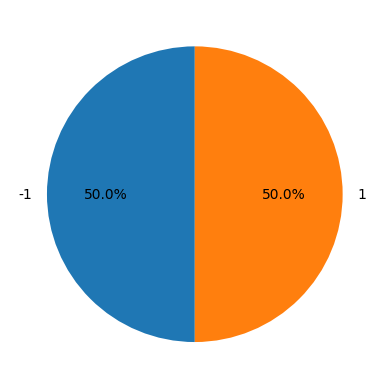

In [64]:
y_tr_re1.plot.pie(autopct="%1.1f%%", labels=y_tr_re[0].unique(), startangle=90)

In [65]:
clf2 = LogisticRegression()

In [66]:
clf2.fit(X_tr_resampled, y_tr_resampled)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [67]:
y_predro = clf2.predict(X_te)

In [68]:
print(accuracy_score(y_predro, y_te))

0.8780918727915195


In [69]:
disp3 = confusion_matrix(y_te, y_predro)

In [70]:
disp3

array([[926, 128],
       [ 10,  68]])

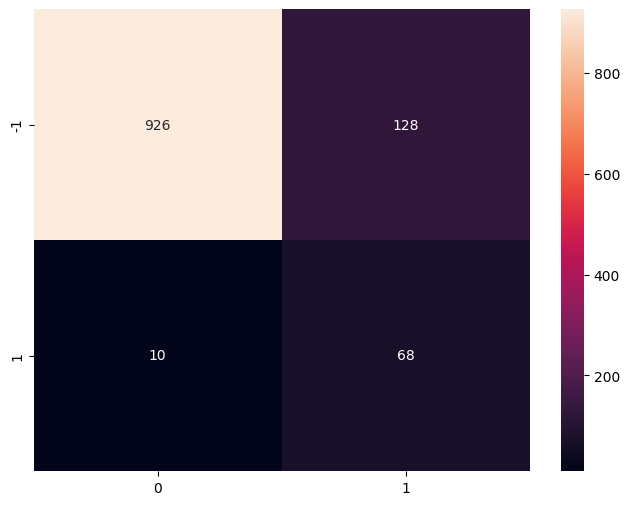

In [71]:
plt.figure(figsize=(8,6))
sns.heatmap(disp3, annot=True, fmt='.0f')
tick_pos = np.arange(0.5, len(disp1), 1)
plt.yticks(tick_pos, [-1, 1])
plt.show()

In [72]:
psrov = precision_score(y_te, y_predro)
rsrov = recall_score(y_te, y_predro)

In [73]:
print(psrov, rsrov)

0.3469387755102041 0.8717948717948718


In [74]:
from imblearn.over_sampling import SMOTE

In [75]:
smote = SMOTE()

In [76]:
X_tr_sm, y_tr_sm = smote.fit_resample(X_tr, y_tr)

In [77]:
y_tr_sm

array([-1, -1,  1, ...,  1,  1,  1])

In [78]:
y_tr_smd = pd.DataFrame(y_tr_sm)

In [79]:
y_tr_smdf = y_tr_smd.value_counts()

<Axes: >

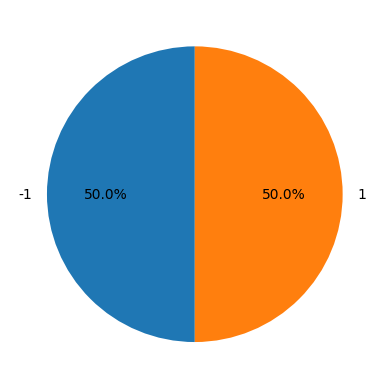

In [80]:
y_tr_smdf.plot.pie(autopct="%1.1f%%", labels=y_tr_smd[0].unique(), startangle=90)

In [81]:
clf3 = LogisticRegression()

In [82]:
clf3.fit(X_tr_sm, y_tr_sm)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [83]:
y_predsm = clf3.predict(X_te)

In [84]:
print(accuracy_score(y_te, y_predsm))

0.8878091872791519


In [85]:
disp4 = confusion_matrix(y_te, y_predsm)

In [86]:
disp4

array([[937, 117],
       [ 10,  68]])

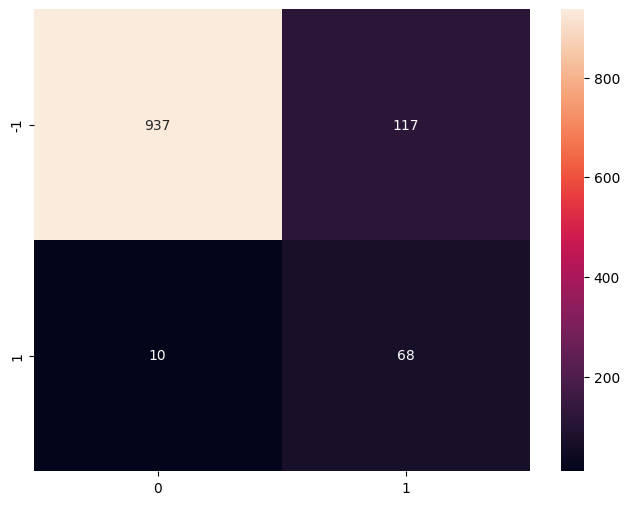

In [87]:
plt.figure(figsize=(8,6))
sns.heatmap(disp4, annot=True, fmt='.0f')
tick_pos = np.arange(0.5, len(disp1), 1)
plt.yticks(tick_pos, [-1, 1])
plt.show()

In [88]:
pssm = precision_score(y_te, y_predsm)
rssm = recall_score(y_te, y_predsm)

In [89]:
print(pssm, rssm)

0.3675675675675676 0.8717948717948718


In [90]:
#noise and overfitting true patterns are not identfied and false positive may increase making model more sensitive to minority

In [91]:
from imblearn.under_sampling import RandomUnderSampler

In [92]:
rus = RandomUnderSampler(random_state=0)

In [93]:
X_tr_us, y_tr_us = rus.fit_resample(X_tr, y_tr)

In [94]:
y_tr_usd = pd.DataFrame(y_tr_us)

In [95]:
y_tr_usdf = y_tr_usd.value_counts()

In [96]:
y_tr_usdf

-1    153
 1    153
dtype: int64

<Axes: >

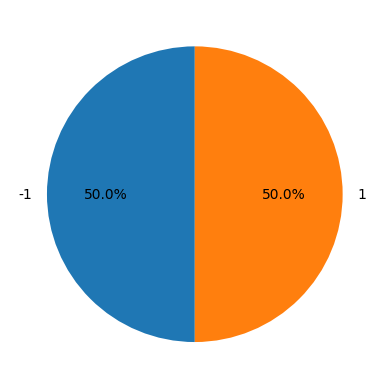

In [97]:
y_tr_usdf.plot.pie(autopct="%1.1f%%", labels=y_tr_usd[0].unique(), startangle=90)

In [98]:
clf4 = LogisticRegression()

In [99]:
clf4.fit(X_tr_us, y_tr_us)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [100]:
y_predus = clf4.predict(X_te)

In [101]:
print(accuracy_score(y_te, y_predus))

0.8842756183745583


In [102]:
disp5 = confusion_matrix(y_te, y_predus)

In [103]:
disp5

array([[933, 121],
       [ 10,  68]])

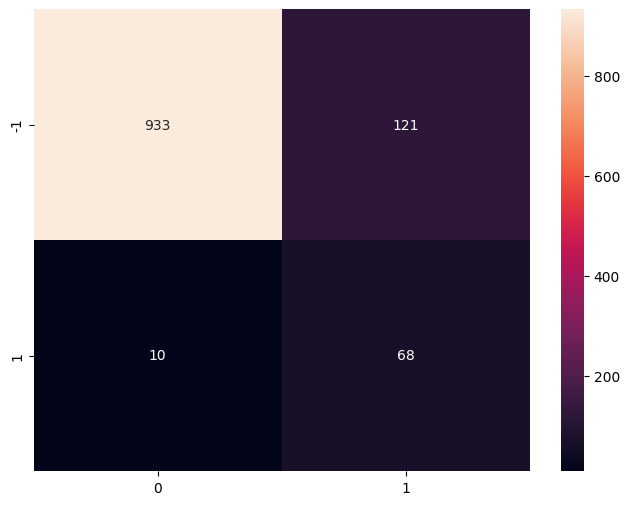

In [104]:
plt.figure(figsize=(8,6))
sns.heatmap(disp5, annot=True, fmt='.0f')
tick_pos = np.arange(0.5, len(disp1), 1)
plt.yticks(tick_pos, [-1, 1])
plt.show()

In [105]:
psusr = precision_score(y_te, y_predus)
rsusr = recall_score(y_te, y_predus)

In [106]:
print(psusr, rsusr)

0.35978835978835977 0.8717948717948718


In [107]:
from imblearn.under_sampling import ClusterCentroids

In [108]:
cc = ClusterCentroids(random_state=0)

In [109]:
X_tr_uscc, y_tr_uscc = cc.fit_resample(X_tr, y_tr)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [110]:
y_tr_usccd = pd.DataFrame(y_tr_uscc)

In [111]:
y_tr_usccdf = y_tr_usccd.value_counts()

In [112]:
y_tr_usccdf

-1    153
 1    153
dtype: int64

<Axes: >

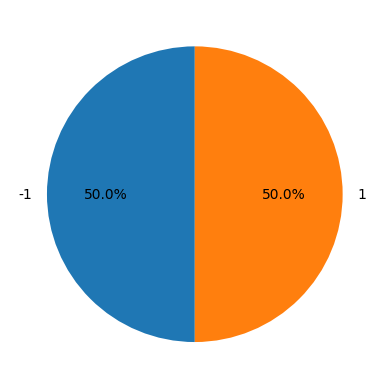

In [113]:
y_tr_usccdf.plot.pie(autopct="%1.1f%%", labels=y_tr_usccd[0].unique(), startangle=90)

In [114]:
clf5 = LogisticRegression()

In [115]:
clf5.fit(X_tr_uscc, y_tr_uscc)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [116]:
y_preduscc = clf5.predict(X_te)

In [117]:
print(accuracy_score(y_te, y_preduscc))

0.7455830388692579


In [118]:
disp6 = confusion_matrix(y_te, y_preduscc)

In [119]:
disp6

array([[768, 286],
       [  2,  76]])

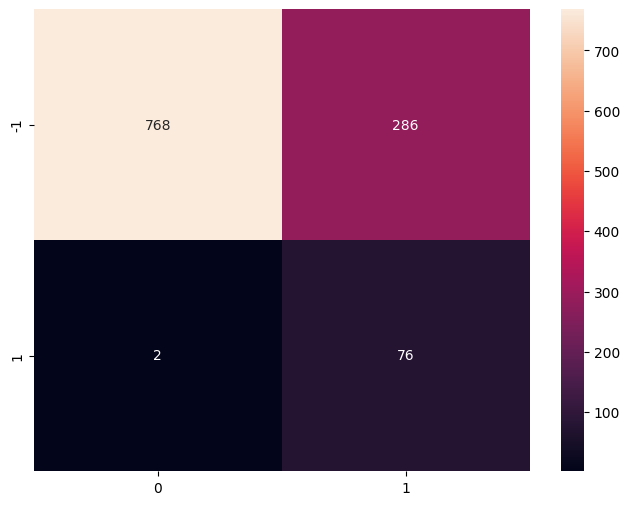

In [120]:
plt.figure(figsize=(8,6))
sns.heatmap(disp6, annot=True, fmt='.0f')
tick_pos = np.arange(0.5, len(disp1), 1)
plt.yticks(tick_pos, [-1, 1])
plt.show()

In [121]:
psuscc = precision_score(y_te, y_preduscc)
rsuscc = recall_score(y_te, y_preduscc)

In [122]:
print(psuscc, rsuscc)

0.20994475138121546 0.9743589743589743


In [123]:
from sklearn.ensemble import BaggingClassifier

In [124]:
clf6 = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=10, random_state=0).fit(X_tr_sm, y_tr_sm)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modul

In [125]:
y_preden = clf6.predict(X_te)

In [126]:
print(accuracy_score(y_te, y_preden))

0.8869257950530035


In [127]:
disp7 = confusion_matrix(y_te, y_preden)

In [128]:
disp7

array([[936, 118],
       [ 10,  68]])

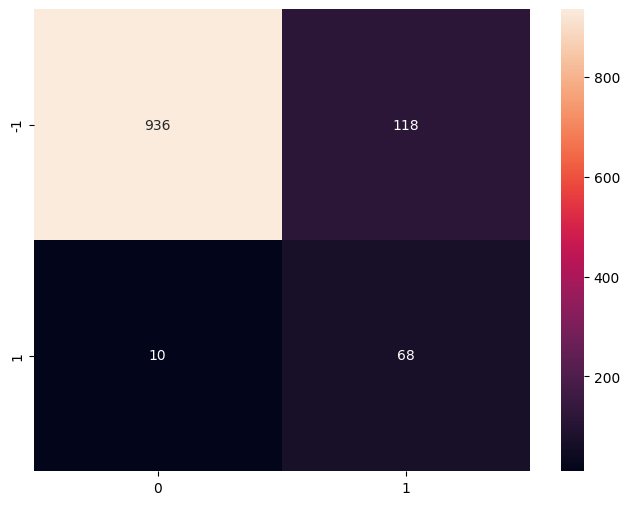

In [129]:
plt.figure(figsize=(8,6))
sns.heatmap(disp7, annot=True, fmt='.0f')
tick_pos = np.arange(0.5, len(disp1), 1)
plt.yticks(tick_pos, [-1, 1])
plt.show()

In [130]:
psen = precision_score(y_te, y_preden)
rsen = recall_score(y_te, y_preden)

In [131]:
print(psen, rsen)

0.3655913978494624 0.8717948717948718
